In [87]:
import os
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
%matplotlib inline

def plot_perf(file_name, varx, ds):
    if varx == 'min':
        varx = 'amin'
    if varx == 'max':
        varx = 'amax'

    if varx not in ('amin', 'amax', 'mean'):
        return "Please select from ('min', 'max', 'mean')"
    
    df1 = pd.read_csv(file_name, header=-1, skiprows=4)

    ttl_var = file_name.split('_')[0].replace('./','')
    df1.columns = ['Epoch','Epsilon', 'Batch','Ys','Recall','Precision','F1', 'Query']
    df1['Recall'] = df1['Recall'].str.replace("Recall = ",'').str.replace('\{','').astype(float)
    df1['Precision'] = df1['Precision'].str.replace("Precision = ",'').str.replace('\}','').astype(float)
    df1['F1'] = df1['F1'].str.replace("F1 = ",'').str.replace('\}','').astype(float)
    df1['Epoch'] = df1['Epoch'].str.replace("Epoch", '').astype(int)
    df1['Ys1'] = df1['Ys'].str.replace(' sum\(y\)', '').str.replace('/len\(y\) = ','').str.split("/").str[0].astype(int)
    df1['YsT'] = df1['Ys'].str.replace(' sum\(y\)', '').str.replace('/len\(y\) = ','').str.split("/").str[1].astype(int)
    df1['Ys0'] = df1['YsT'] - df1['Ys1']
    df1['Query'] = df1['Query'].str.replace('query = ', '').str.replace("\t", '').str.strip()
    ms = []

#     for metric in ('Ys0', 'Ys1', 'YsT'):
    for metric in ('Precision', 'Recall', 'F1'):
        df1ss = df1[ (df1['Query'] == ds ) & (df1['Batch'] == ' minibatch 2/2')]
        grouped = df1ss[[metric,'Epoch']].groupby(['Epoch'])
        df2 = grouped.agg({np.min, np.mean, np.max })
        df2.columns = df2.columns.droplevel(0)
        df2 = df2.rename_axis(None, axis=1)
        df2 = df2.reset_index()
        ms.append( (metric, df2[varx] ))
        print('Average performance of %s is %.6f', (metric, df2['mean'].max()))

    plt.figure(figsize=(16, 8))
    plt.title(ttl_var + ' average precision, recall, and f1 across epochs')
    plt.plot(df2['Epoch'], ms[0][1], label=ms[0][0], c='purple')
    plt.plot(df2['Epoch'], ms[1][1], label=ms[1][0], c='blue')
    plt.plot(df2['Epoch'], ms[2][1], label=ms[2][0], c='red')
#     plt.ylim(0,1)
    plt.xlabel('Epochs')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()
    
    return df1

('Average performance of %s is %.6f', ('Precision', 0.262042))
('Average performance of %s is %.6f', ('Recall', 0.12682299999999999))
('Average performance of %s is %.6f', ('F1', 0.14684800000000001))


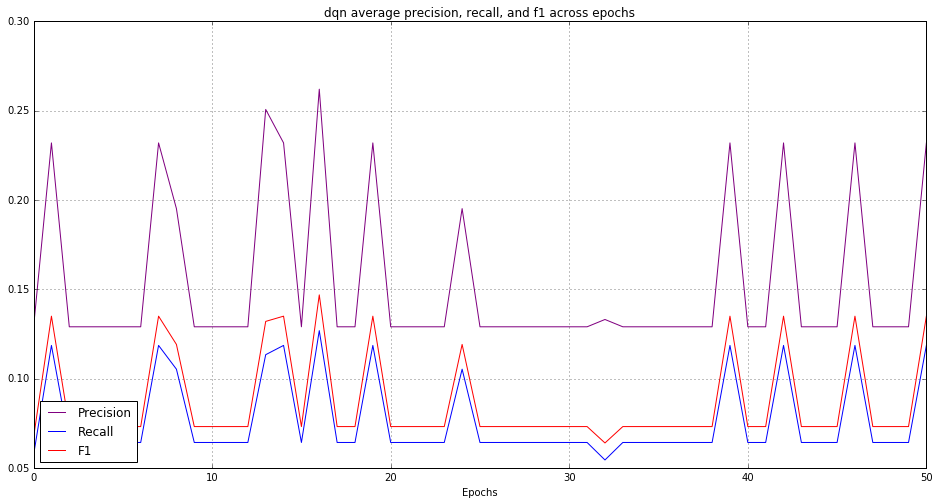

In [99]:
bowdf = plot_perf('./dqn_full_bow_model_perf.txt', 'mean', 'sandy')

('Average performance of %s is %.6f', ('Precision', 0.28654200000000002))
('Average performance of %s is %.6f', ('Recall', 0.13436000000000001))
('Average performance of %s is %.6f', ('F1', 0.15579200000000001))


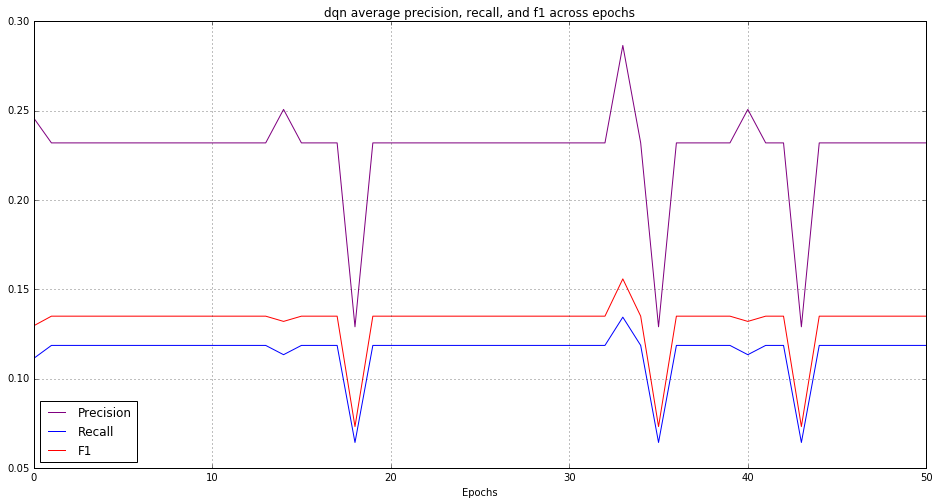

In [98]:
lstmdf = plot_perf('./dqn_full_lstm_model_perf.txt', 'mean', 'sandy')

In [ ]:
rnndf = plot_perf('./dqn_full_lstm_model_perf.txt', 'mean', 'aurora')

In [ ]:
rnndf = plot_perf('./dqn_full_lstm_model_perf.txt', 'mean', 'pakistan')

In [ ]:
bowdf.head()

In [ ]:
bowdf[ bowdf['Epoch']==0].F1.plot(kind='density', color='blue')
bowdf[ bowdf['Epoch']==0].Recall.plot(kind='density', color='red')
bowdf[ bowdf['Epoch']==0].Precision.plot(kind='density', color = 'purple')

In [ ]:
plot_perf('./dqn_full_lstm_model_perf.txt', 'mean')

In [ ]:
plot_perf('./dqn_lstm_model_perf.txt', 'mean')

In [ ]:
plot_perf('./dqn_bow_model_perf.txt', 'mean')

In [49]:
def CompareFiles(sent_file, nugg_file, title):
    df1 = pd.read_csv(sent_file)
    df1n = pd.read_csv(nugg_file)
    from itertools import chain
    txts = []
    for el in df1['Text']:
        txts.append([int(j) for j in el.split(" ")])

    nuggs = []
    for el in df1n['Text']:
        nuggs.append([int(j) for j in el.split(" ")])

    uniq_text = set(list(chain(*txts)))
    uniq_nuggs = set(list(chain(*nuggs)))
    txtnugg_overlap = len(uniq_text.intersection(uniq_nuggs))
    print('the intersection for %s of sentence tokens and nugget tokens is %i out of %i nuggets and %i tokens' % 
          (title, txtnugg_overlap, len(uniq_nuggs), len(uniq_text)) )
    print('%i/%i = %.6f and %i/%i = %.6f' % (txtnugg_overlap, len(uniq_nuggs), txtnugg_overlap/float(len(uniq_nuggs)),
         txtnugg_overlap, len(uniq_text), txtnugg_overlap/float(len(uniq_text))))

In [50]:
CompareFiles('../DO_NOT_UPLOAD_THIS_DATA/0-output/2012_aurora_shooting_first_sentence_numtext2.csv',
             '../DO_NOT_UPLOAD_THIS_DATA/0-output/aurora_nuggets_numtext.csv', 'aurora')

the intersection for aurora of sentence tokens and nugget tokens is 543 out of 664 nuggets and 2762 tokens
543/664 = 0.817771 and 543/2762 = 0.196597


In [51]:
CompareFiles('../DO_NOT_UPLOAD_THIS_DATA/0-output/hurricane_sandy_first_sentence_numtext2.csv',
             '../DO_NOT_UPLOAD_THIS_DATA/0-output/sandy_nuggets_numtext.csv', 'sandy')

the intersection for sandy of sentence tokens and nugget tokens is 585 out of 732 nuggets and 2827 tokens
585/732 = 0.799180 and 585/2827 = 0.206933


In [52]:
CompareFiles('../DO_NOT_UPLOAD_THIS_DATA/0-output/2012_pakistan_garment_factory_fires_first_sentence_numtext2.csv',
             '../DO_NOT_UPLOAD_THIS_DATA/0-output/pakistan_nuggets_numtext.csv', 'pakistan')

the intersection for pakistan of sentence tokens and nugget tokens is 170 out of 200 nuggets and 2803 tokens
170/200 = 0.850000 and 170/2803 = 0.060649


In [54]:
ndf = pd.read_csv('../DO_NOT_UPLOAD_THIS_DATA/trec-2013-data/nuggets.tsv.gz', sep='\t')

In [55]:
ndf.head()

,query_id,nugget_id,timestamp,importance,nugget_len,nugget_text
0,TS13.1,VMTS13.01.050,1329945286,3,6,"train accident in Buenos Aires, Argentina."
1,TS13.1,VMTS13.01.051,1329945286,3,4,unknown number were killed
2,TS13.1,VMTS13.01.052,1329945286,3,2,Hundreds injured
3,TS13.1,VMTS13.01.053,1329946985,1,2,in 2012
4,TS13.1,VMTS13.01.054,1329947346,1,3,"February 22, 2012"


In [74]:
adf = ndf[ndf['query_id']=='TS13.3'].copy()

In [81]:
out = []
adf['nugget_text2'] = adf['nugget_text'].str.replace('[^A-Za-z0-9]+', ' ').str.strip()#.str.lower()
texts = [ t.split(" ") for t in adf['nugget_text2'] ]


In [82]:
ns = listchain(*texts)

In [83]:
len(ns)

1143